In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
%config InlineBackend.rc = {"figure.figsize":(15.0, 12.0)}
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.pipeline import Pipeline
import os
import re
import time
from scipy import stats
from scipy.signal import find_peaks

In [2]:
def find_cutting_height(y_values):# calculate mode and accept only a little fractal of the standarddeviation around it as cutting height of the z-axis
    mode_value = stats.mode(y_values)[0]
    std_value = np.std(y_values)
    cutting_height = mode_value + std_value/100
    return(cutting_height)

def find_cutting_time(y_values): # Defines a function that finds starting point and end point of each cutting process
    start_cutting = []
    end_cutting = []
    ch = find_cutting_height(y_values = y_werte)
    for i in range(len(y_values)):
        if i < 1:
            continue
        if y_values[i] < ch and y_values[i-1] >= ch:#96.825#96.605
            start_cutting.append(i)
    for i in range(len(y_values)):
        if i < 1:
            continue
        if y_values[i] >= ch and y_values[i-1] < ch:
            end_cutting.append(i-1)
    return(start_cutting, end_cutting)

def find_peaks(y_values): # uses the find_cutting_time function to create a list of tupels, consisting of the actual cutting processes (start-index, end-index)
    peaks = []
    start, end = find_cutting_time(y_values = y_werte)
    for j in range(len(start)):
        peaks.append((start[j], end[j]))
    return(peaks)  

def find_peak_timesections(y_values): # converts the tupels into a list of indices that refer to the cutting process
    timesections_to_filter_out = []
    peaks = find_peaks(y_values = y_werte)
    for k in range(len(peaks)):
        if k == 0:
            num = peaks[k][0]
            timesections_to_filter_out.append((np.linspace(0, peaks[k][0], num+1)).tolist())
        else:
            num = peaks[k][0]-peaks[k-1][1]
            timesections_to_filter_out.append((np.linspace(peaks[k-1][1] ,peaks[k][0], num+1)).tolist())
    return(timesections_to_filter_out)

def build_list_of_indices_to_drop(y_values): # takes the output of find_peak_timesections to convert it into a single list of indices that afterwards can be dropped by using "df.drop(indices)"
    indices_to_drop = []
    timesections = find_peak_timesections(y_values= y_werte)
    for timesection in timesections:
        for index in timesection:
            indices_to_drop.append(int(index))
    return(indices_to_drop)

In [3]:
files = os.listdir("C:/Users/N.Weisbrod_lokal/ownCloud/Projekte/EnterPrise/Maschinendaten/Schrupp_Tools/003/")

root_path = "C:/Users/N.Weisbrod_lokal/ownCloud/Projekte/EnterPrise/Maschinendaten/Schrupp_Tools/003/"
paths= []

for file in files:
    paths.append(os.path.join(root_path, file))
#print(sorted(paths))
DFS=[]
for i in range(len(paths)):
    path = paths[i]
    DFS.append("df"+path[-13:])
dfs=[]
for df in DFS:
    df = re.sub("/|.csv","", df)
    dfs.append(df)

dfsSL=[]
dfsSR=[]

for df in dfs:
    if "SL" in df:
        dfsSL.append(df)
    else:
        dfsSR.append(df)


tools_SR= []
for dfSR in dfsSR:
    if dfSR not in tools_SR:
        tools_SR.append(dfSR)
    else:
        continue


tool_nrs=[]
for i in range(1, len(tools_SR)+1):
    tool_nrs.append("{:03d}".format(i,))
    


DataFrames={}
for path in paths:
    for tool_nr in tool_nrs:
        if tool_nr in path:
            if tool_nr not in DataFrames:
                data = pd.read_csv(path, header = None, delimiter = ";", index_col = False, 
                                    skiprows = range(0,8), decimal = ',', names = ["time", "DrehmomentX", "DrehmomentY", "DrehmomentZ","DrehmomentS1",
                                    "GeschwindigkeitX", "GeschwindigkeitY", "GeschwindigkeitZ", "GeschwindigkeitS1", 
                                    "LageistwertX", "LageistwertY", "LageistwertZ", 
                                    "Wirkleistung", "Trigger", "Trigger2", "Zählen", "BearbeitungsvorschubK1",
                                    "WerkzeugeinsatzK1", "Zählwert", "Nacharbeit", "Alarme Aus", "Lernen", "AchseK1",
                                    "Override-Wert", "Programmnummer", "Werkzeugnummer", "Werkzeug-Typ", "Bearbeitungsnummer",
                                    "Schneidennummer", "Quellkanal", "Programm", "Bearbeitung", "Werkzeug", "ID", "AchseK2",
                                    "AchseK3", "AchseK4", "AchseK5", "AchseK6", "AchseK7", "AchseK8", "AchseK9", "AchseK10",
                                    "AchseK11", "AchseK12", "Gef.DrehmomentS1", "Testwert0S1", "Gef.DrehmomentZ", "Testwert1Z"])
                y_werte = data["LageistwertZ"]
                indices = build_list_of_indices_to_drop(y_values = y_werte)#preprocessing Step
                data = data.drop(indices).drop(data.tail(50).index)
                DataFrames[tool_nr]= data
                
                
            else:
                new_data = pd.read_csv(path, header = None, delimiter = ";", index_col = False, 
                                        skiprows = range(0,8), decimal = ',', names = ["time", "DrehmomentX", "DrehmomentY", "DrehmomentZ","DrehmomentS1",
                                        "GeschwindigkeitX", "GeschwindigkeitY", "GeschwindigkeitZ", "GeschwindigkeitS1", 
                                        "LageistwertX", "LageistwertY", "LageistwertZ", 
                                        "Wirkleistung", "Trigger", "Trigger2", "Zählen", "BearbeitungsvorschubK1",
                                        "WerkzeugeinsatzK1", "Zählwert", "Nacharbeit", "Alarme Aus", "Lernen", "AchseK1",
                                        "Override-Wert", "Programmnummer", "Werkzeugnummer", "Werkzeug-Typ", "Bearbeitungsnummer",
                                        "Schneidennummer", "Quellkanal", "Programm", "Bearbeitung", "Werkzeug", "ID", "AchseK2",
                                        "AchseK3", "AchseK4", "AchseK5", "AchseK6", "AchseK7", "AchseK8", "AchseK9", "AchseK10",
                                        "AchseK11", "AchseK12", "Gef.DrehmomentS1", "Testwert0S1", "Gef.DrehmomentZ", "Testwert1Z"])
                y_werte = new_data["LageistwertZ"]
                indices = build_list_of_indices_to_drop(y_values = y_werte)#preprocessing Step
                new_data = new_data.drop(indices).drop(new_data.tail(50).index)
                new_data["time"]= new_data["time"]+ DataFrames[tool_nr]["time"][len(DataFrames[tool_nr])-1]
                DataFrames[tool_nr] = DataFrames[tool_nr].append(new_data, ignore_index = True)

C:\Users\N.Weisbrod_lokal\AppData\Local\Temp\ipykernel_14936\3701935352.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrames[tool_nr] = DataFrames[tool_nr].append(new_data, ignore_index = True)
C:\Users\N.Weisbrod_lokal\AppData\Local\Temp\ipykernel_14936\3701935352.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrames[tool_nr] = DataFrames[tool_nr].append(new_data, ignore_index = True)
C:\Users\N.Weisbrod_lokal\AppData\Local\Temp\ipykernel_14936\3701935352.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrames[tool_nr] = DataFrames[tool_nr].append(new_data, ignore_index = True)
C:\Users\N.Weisbrod_lokal\AppData\Local\Temp\ipykernel_14936\3701935352.py:78: FutureWarning: The frame.append method 

In [4]:
dff = DataFrames["003"]

In [5]:
dff

,time,DrehmomentX,DrehmomentY,DrehmomentZ,DrehmomentS1,GeschwindigkeitX,GeschwindigkeitY,GeschwindigkeitZ,GeschwindigkeitS1,LageistwertX,...,AchseK7,AchseK8,AchseK9,AchseK10,AchseK11,AchseK12,Gef.DrehmomentS1,Testwert0S1,Gef.DrehmomentZ,Testwert1Z
0,2.630000,3.7,2.0,51.3,0.0,0.0500,0.12040,1.98120,2639.027778,-100.5379,...,0.0,0.0,0.0,0.0,0.0,0.0,1.009552e-65,0.016969,43.017476,0.366710
1,2.640001,0.4,4.2,53.2,0.0,0.0500,0.12040,1.98120,2639.027778,-100.5317,...,0.0,0.0,0.0,0.0,0.0,0.0,8.360987e-66,0.010930,42.980111,0.236205
2,2.659999,0.6,5.3,45.4,0.0,0.0500,0.12040,1.98120,2639.027778,-100.5180,...,0.0,0.0,0.0,0.0,0.0,0.0,5.735194e-66,0.004536,43.017762,0.098017
3,2.670002,1.5,5.0,46.1,0.0,0.1883,0.45890,0.00590,2638.761111,-100.5108,...,0.0,0.0,0.0,0.0,0.0,0.0,4.749632e-66,0.091996,44.441020,0.766213
4,2.690000,2.3,7.2,45.6,0.0,0.1883,0.45890,0.00590,2638.761111,-100.4970,...,0.0,0.0,0.0,0.0,0.0,0.0,3.258040e-66,0.038176,46.595039,0.317962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906772,33345.070014,6.5,5.7,45.9,0.0,0.0689,0.18738,0.00022,949.478000,-109.7033,...,0.0,0.0,0.0,0.0,0.0,0.0,1.146253e-24,0.284308,45.997831,0.000078
2906773,33345.080014,6.7,5.5,45.9,0.0,0.0689,0.18738,0.00022,949.478000,-109.7173,...,0.0,0.0,0.0,0.0,0.0,0.0,9.493258e-25,0.183135,45.981023,0.000050
2906774,33345.090012,6.6,5.6,45.9,0.0,0.0689,0.18738,0.00022,949.478000,-109.7311,...,0.0,0.0,0.0,0.0,0.0,0.0,7.862623e-25,0.117976,45.984283,0.000032
2906775,33345.110012,6.6,5.4,45.9,0.0,0.0689,0.18738,0.00022,949.478000,-109.7452,...,0.0,0.0,0.0,0.0,0.0,0.0,5.393235e-25,0.048954,45.957812,0.000013


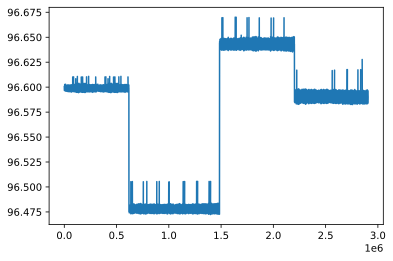

In [13]:
#plt.plot(torque_z)
plt.plot(dff["LageistwertZ"])
#plt.xlim(0, 10000)
#plt.xlim(1113966, 1114100)
#plt.ylim(-45, 56)
plt.show()